### 《统计学习方法》--K近邻的代码实现

#### 距离度量
$$ L_p(x_i, x_j) = \big(\sum_{i=1}^n\big|x_i^{(i)} - x_j^{(l)}\big|^p\big)^{\frac{1}{p}} $$
* p = 1 曼哈顿距离、街区距离  
* p = 2 欧式距离  
* p = $\infty$ 切比雪夫距离

In [12]:
import math

In [4]:
def distance(x, y, p=2):
    """距离计算，默认为L2范式距离"""

    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    else:
        return 0

#### 课本例题 3.1

In [5]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

In [11]:
# x1, x2, x3
for i in range(1, 5):
    r = {'[1, 1] - {}'.format(c): distance(x1, c, p=i) for c in [x2, x3]}
    print(min(zip(r.values(), r.keys())))

(4.0, '[1, 1] - [5, 1]')
(4.0, '[1, 1] - [5, 1]')
(3.7797631496846193, '[1, 1] - [4, 4]')
(3.5676213450081633, '[1, 1] - [4, 4]')


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter

In [15]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 增加标签列
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


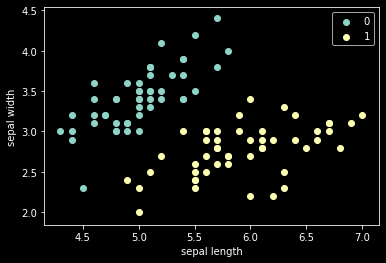

In [24]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [25]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
class KNN():
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量 
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        
        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count

    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [35]:
clf = KNN(X_train, y_train)

In [36]:
clf.score(X_test, y_test)

1.0

In [37]:
test_point = [6, 3]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


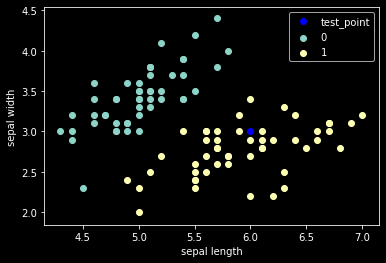

In [38]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

#### scikit-learn 实例
sklearn.neighbors.KNeighborsClassifier  
* n_neighbors: 临近点个数  
* p: 距离度量  
* algorithm: 近邻算法 auto, ball_tree, kd_tree, brute  
* weights: 确定近邻的权重

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
clf_sk.score(X_test, y_test)

1.0

In [42]:
# kd-tree 每个节点中主要包含的数据结构如下
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split  # 整数（进行分割维度的序号）
        self.left = left  # 该节点分割超平面左子空间构成的kd-tree
        self.right = right # 该节点分割超平面右子空间构成的kd-tree

In [43]:
class KdTree():
    def __init__(self, data):
        k = len(data[0])  # 数据维度

        def CreateNode(self, split, data_set):   # 按第split维划分数据集
            if not data_set:  # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            # data_set.sort(key=itemgetter(split))  按要进行分割
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2  
            median = data_set[split_pos]
            split_next = (split + 1) % k

            # 递归的创建kd树
            return KdNode(median, split, CreateNode(split_next, data_set[:split_pos]),CreateNode(split_next, data_set[split_pos + 1:]))

        self.root = CreateNode(0, data)   # 从第0维开始构建kd树，返回根节点

In [44]:
# KdTree的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [ ]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点：
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple, 分别存放最近坐标点，最近距离和访问过的节点数
result = namedtuple('Result_tuple", "nearest_point  nearest_dist  nodes_visited")

def find_nearest(tree, point):
    k = len(point) 